In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import catboost
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import SGDRegressor

In [2]:
data = pd.read_csv("car dataset.csv")

In [3]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
data.select_dtypes(include='object').columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [5]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
dataset = data.drop('name', axis=1)

In [7]:
dataset

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [8]:
dataset['current_year']=2023

In [9]:
dataset

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2023
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2023
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2023
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2023
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2023
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,2023
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,2023
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,2023
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,2023


In [10]:
dataset['car_age'] = dataset['current_year']-dataset['year']

In [11]:
dataset = dataset.drop(columns = ['current_year', 'year'])

In [12]:
dataset

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,16
1,135000,50000,Petrol,Individual,Manual,First Owner,16
2,600000,100000,Diesel,Individual,Manual,First Owner,11
3,250000,46000,Petrol,Individual,Manual,First Owner,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,9
...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,9
4336,409999,80000,Diesel,Individual,Manual,Second Owner,9
4337,110000,83000,Petrol,Individual,Manual,Second Owner,14
4338,865000,90000,Diesel,Individual,Manual,First Owner,7


In [13]:
dataset.select_dtypes(include='object').columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [14]:
dataset['fuel'].nunique()

5

In [15]:
dataset['seller_type'].nunique()

3

In [16]:
dataset['transmission'].nunique()

2

In [17]:
dataset['owner'].nunique()

5

In [18]:
dataset = pd.get_dummies(dataset, drop_first=True)


In [19]:
dataset

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,16,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,16,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,11,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,6,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,9,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,9,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,9,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,14,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,7,1,0,0,0,1,0,1,0,0,0,0


In [20]:
corr = dataset.corr()

In [21]:
corr

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
car_age,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


<AxesSubplot:>

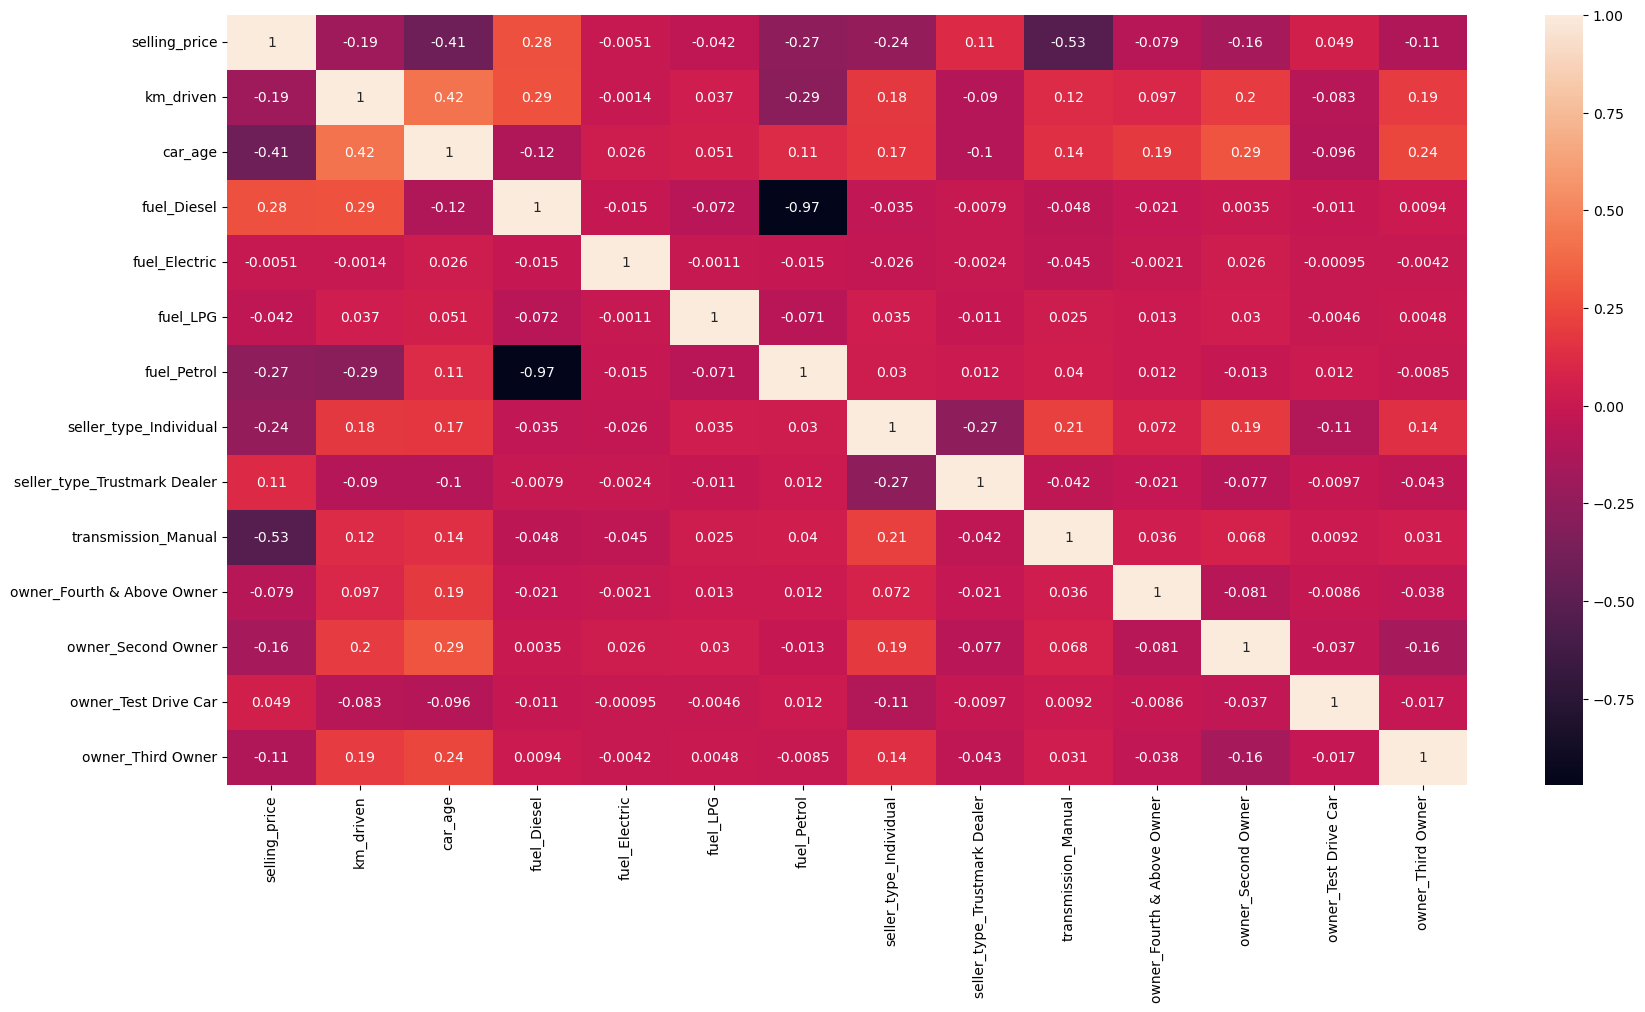

In [22]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)

In [23]:
x = dataset.drop('selling_price', axis=1)
x

,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,16,0,0,0,1,1,0,1,0,0,0,0
1,50000,16,0,0,0,1,1,0,1,0,0,0,0
2,100000,11,1,0,0,0,1,0,1,0,0,0,0
3,46000,6,0,0,0,1,1,0,1,0,0,0,0
4,141000,9,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,80000,9,1,0,0,0,1,0,1,0,1,0,0
4336,80000,9,1,0,0,0,1,0,1,0,1,0,0
4337,83000,14,0,0,0,1,1,0,1,0,1,0,0
4338,90000,7,1,0,0,0,1,0,1,0,0,0,0


In [24]:
y = dataset['selling_price']
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2099, random_state=0)

In [26]:
model = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [27]:
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [28]:
model.score(x_test, y_test)

0.7413433906142427

In [29]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [30]:
params = {
  'n_estimators': [10, 50, 100, 150, 200, 500],
  'max_features': ['auto', 'sqrt', 'log2'],
  'max_depth': [None, 10, 20, 30, 40],
  'min_samples_split': [2, 5, 10, 15, 20],
  'min_samples_leaf': [1, 2, 4],
  'bootstrap': [True, False]
}


In [31]:
from catboost import CatBoostRegressor

In [38]:
mdl = CatBoostRegressor(random_state=42)

In [39]:
mdl.fit(x_train, y_train)

Learning rate set to 0.049743
0:	learn: 554095.1273674	total: 4.79ms	remaining: 4.78s
1:	learn: 539863.3350703	total: 8.04ms	remaining: 4.01s
2:	learn: 526896.9440237	total: 10.9ms	remaining: 3.64s
3:	learn: 514200.3039358	total: 14.5ms	remaining: 3.6s
4:	learn: 503116.8868683	total: 16.4ms	remaining: 3.27s
5:	learn: 491289.1685587	total: 19.5ms	remaining: 3.23s
6:	learn: 481125.6042662	total: 21.8ms	remaining: 3.09s
7:	learn: 471591.0485534	total: 24.5ms	remaining: 3.04s
8:	learn: 462286.9554234	total: 29.4ms	remaining: 3.23s
9:	learn: 453341.7246273	total: 32.4ms	remaining: 3.21s
10:	learn: 445015.1141214	total: 37.1ms	remaining: 3.33s
11:	learn: 437684.1493951	total: 42.1ms	remaining: 3.47s
12:	learn: 430745.4153458	total: 46.2ms	remaining: 3.5s
13:	learn: 424433.3355975	total: 50.9ms	remaining: 3.58s
14:	learn: 418425.3628278	total: 55.6ms	remaining: 3.65s
15:	learn: 412307.9241285	total: 76.9ms	remaining: 4.73s
16:	learn: 406803.7140946	total: 81.7ms	remaining: 4.72s
17:	learn: 40

155:	learn: 287032.3887790	total: 994ms	remaining: 5.38s
156:	learn: 286699.8626881	total: 997ms	remaining: 5.35s
157:	learn: 286480.9795845	total: 1000ms	remaining: 5.33s
158:	learn: 286301.1708573	total: 1s	remaining: 5.3s
159:	learn: 286178.6542328	total: 1s	remaining: 5.27s
160:	learn: 286024.2794383	total: 1s	remaining: 5.24s
161:	learn: 285880.2765804	total: 1.01s	remaining: 5.22s
162:	learn: 285261.7141287	total: 1.01s	remaining: 5.19s
163:	learn: 285080.3884092	total: 1.01s	remaining: 5.17s
164:	learn: 284785.2125733	total: 1.02s	remaining: 5.16s
165:	learn: 284734.1552806	total: 1.02s	remaining: 5.14s
166:	learn: 284241.9031965	total: 1.04s	remaining: 5.17s
167:	learn: 283957.5018239	total: 1.04s	remaining: 5.15s
168:	learn: 283718.3779141	total: 1.04s	remaining: 5.14s
169:	learn: 283360.2260259	total: 1.05s	remaining: 5.12s
170:	learn: 283242.5708511	total: 1.05s	remaining: 5.11s
171:	learn: 282949.2370916	total: 1.06s	remaining: 5.09s
172:	learn: 282919.3503199	total: 1.06s	

331:	learn: 254072.4573123	total: 1.99s	remaining: 4s
332:	learn: 253840.1105948	total: 1.99s	remaining: 4s
333:	learn: 253652.6881205	total: 2s	remaining: 3.98s
334:	learn: 253343.7624793	total: 2s	remaining: 3.97s
335:	learn: 253118.8185528	total: 2s	remaining: 3.96s
336:	learn: 252708.6737071	total: 2.01s	remaining: 3.95s
337:	learn: 252619.8558324	total: 2.01s	remaining: 3.94s
338:	learn: 252598.8465257	total: 2.01s	remaining: 3.92s
339:	learn: 252524.2396300	total: 2.04s	remaining: 3.95s
340:	learn: 252486.7384596	total: 2.05s	remaining: 3.97s
341:	learn: 252282.2895104	total: 2.06s	remaining: 3.96s
342:	learn: 251985.1952664	total: 2.06s	remaining: 3.95s
343:	learn: 251948.0144737	total: 2.06s	remaining: 3.94s
344:	learn: 251911.4190560	total: 2.07s	remaining: 3.93s
345:	learn: 251713.9639889	total: 2.07s	remaining: 3.92s
346:	learn: 251634.3591108	total: 2.07s	remaining: 3.9s
347:	learn: 251548.4162071	total: 2.08s	remaining: 3.89s
348:	learn: 251410.0660655	total: 2.09s	remaini

493:	learn: 232124.2958105	total: 2.98s	remaining: 3.05s
494:	learn: 232003.2106535	total: 2.99s	remaining: 3.05s
495:	learn: 231974.7130813	total: 2.99s	remaining: 3.04s
496:	learn: 231854.1411948	total: 2.99s	remaining: 3.03s
497:	learn: 231825.6889916	total: 3s	remaining: 3.02s
498:	learn: 231800.6714258	total: 3s	remaining: 3.01s
499:	learn: 231573.2270456	total: 3.01s	remaining: 3.01s
500:	learn: 231429.1268854	total: 3.02s	remaining: 3s
501:	learn: 231314.1415894	total: 3.02s	remaining: 3s
502:	learn: 231206.2920706	total: 3.03s	remaining: 2.99s
503:	learn: 231040.8354551	total: 3.03s	remaining: 2.98s
504:	learn: 230859.5492197	total: 3.04s	remaining: 2.98s
505:	learn: 230748.9106238	total: 3.04s	remaining: 2.97s
506:	learn: 230685.3636343	total: 3.04s	remaining: 2.96s
507:	learn: 230637.2908422	total: 3.05s	remaining: 2.95s
508:	learn: 230624.3542110	total: 3.05s	remaining: 2.94s
509:	learn: 230542.3056134	total: 3.06s	remaining: 2.94s
510:	learn: 230510.9948458	total: 3.08s	rem

662:	learn: 218219.5736056	total: 3.96s	remaining: 2.01s
663:	learn: 218188.2611856	total: 3.97s	remaining: 2.01s
664:	learn: 218145.8178525	total: 3.97s	remaining: 2s
665:	learn: 218088.7919727	total: 3.97s	remaining: 1.99s
666:	learn: 217997.2607461	total: 3.97s	remaining: 1.98s
667:	learn: 217971.4453997	total: 3.97s	remaining: 1.98s
668:	learn: 217930.9330829	total: 3.98s	remaining: 1.97s
669:	learn: 217864.0008690	total: 3.98s	remaining: 1.96s
670:	learn: 217818.7621771	total: 3.98s	remaining: 1.95s
671:	learn: 217808.0842534	total: 3.98s	remaining: 1.94s
672:	learn: 217763.7866655	total: 3.99s	remaining: 1.94s
673:	learn: 217729.2542103	total: 3.99s	remaining: 1.93s
674:	learn: 217660.2109674	total: 3.99s	remaining: 1.92s
675:	learn: 217606.7851307	total: 4.02s	remaining: 1.93s
676:	learn: 217588.0125124	total: 4.02s	remaining: 1.92s
677:	learn: 217440.7451766	total: 4.03s	remaining: 1.91s
678:	learn: 217407.9513210	total: 4.03s	remaining: 1.91s
679:	learn: 217335.4871381	total: 

830:	learn: 208688.4083031	total: 4.97s	remaining: 1.01s
831:	learn: 208493.5589601	total: 4.97s	remaining: 1s
832:	learn: 208448.8353365	total: 4.97s	remaining: 997ms
833:	learn: 208377.4675650	total: 4.98s	remaining: 991ms
834:	learn: 208358.0794523	total: 4.98s	remaining: 984ms
835:	learn: 208226.7187796	total: 4.99s	remaining: 978ms
836:	learn: 208166.9324708	total: 4.99s	remaining: 972ms
837:	learn: 208146.7022634	total: 5s	remaining: 968ms
838:	learn: 208138.4739668	total: 5.01s	remaining: 961ms
839:	learn: 208097.7647377	total: 5.01s	remaining: 955ms
840:	learn: 208055.2679398	total: 5.02s	remaining: 949ms
841:	learn: 208005.4845327	total: 5.02s	remaining: 942ms
842:	learn: 207972.1061975	total: 5.03s	remaining: 936ms
843:	learn: 207948.8431398	total: 5.03s	remaining: 930ms
844:	learn: 207942.2348201	total: 5.03s	remaining: 923ms
845:	learn: 207875.0882108	total: 5.04s	remaining: 917ms
846:	learn: 207820.1417297	total: 5.04s	remaining: 911ms
847:	learn: 207767.3438557	total: 5.0

In [40]:
mdl.score(x_test, y_test)

0.7415975308305887

In [150]:
rsv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=1000, n_jobs=-1, cv=5, verbose=2)

In [151]:
rsv.fit(x_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         500]},
                   verbose=2)

In [152]:
rsv.score(x_test, y_test)

0.7437842898089189